In [1]:
import pandas

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [6]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.metrics import accuracy_score, f1_score

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso, Ridge
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [11]:
data=pandas.read_excel('C:/Users/chexi/Downloads/DSML PMA Dataset2425.xlsx')

In [12]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,NaN,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [13]:
data.isnull().sum()

App                  1
Category            14
Rating            1474
Reviews              3
Size                 6
Installs            13
Type                 8
Price                0
Content Rating       6
Genres              10
Last Updated         4
Current Ver         12
Android Ver          8
dtype: int64

In [14]:
data=data.dropna()

In [15]:
data.nunique()

App               8153
Category            33
Rating              39
Reviews           5959
Size               413
Installs            19
Type                 2
Price               73
Content Rating       6
Genres             115
Last Updated      1296
Current Ver       2586
Android Ver         31
dtype: int64

In [16]:
data['Category'].value_counts()

FAMILY                 1739
GAME                   1091
TOOLS                   732
PRODUCTIVITY            351
MEDICAL                 343
COMMUNICATION           326
FINANCE                 322
SPORTS                  319
PHOTOGRAPHY             315
PERSONALIZATION         312
LIFESTYLE               312
BUSINESS                302
HEALTH_AND_FITNESS      295
SOCIAL                  257
SHOPPING                237
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  190
BOOKS_AND_REFERENCE     175
VIDEO_PLAYERS           160
ENTERTAINMENT           148
EDUCATION               147
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          100
HOUSE_AND_HOME           75
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   56
PARENTING                50
EVENTS                   44
BEAUTY                   42
Name: Category, dtype: int64

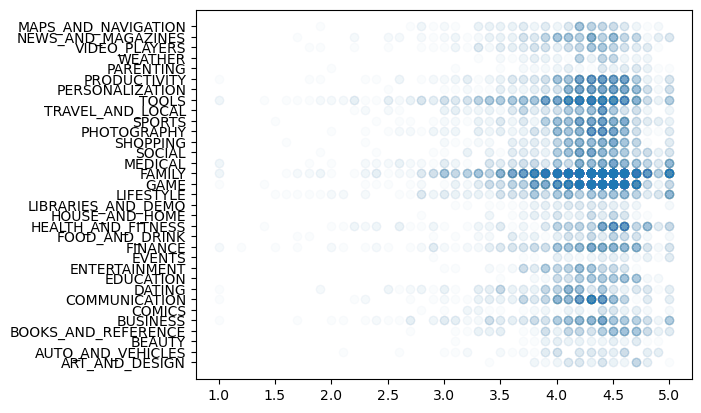

In [17]:
plt.plot(data['Rating'],data['Category'],'o',alpha=0.02)

In [18]:
data['Genres'].value_counts()

Tools                          731
Entertainment                  532
Education                      460
Action                         357
Productivity                   351
                              ... 
Health & Fitness;Education       1
Music & Audio;Music & Video      1
Arcade;Pretend Play              1
Entertainment;Education          1
Strategy;Creativity              1
Name: Genres, Length: 115, dtype: int64

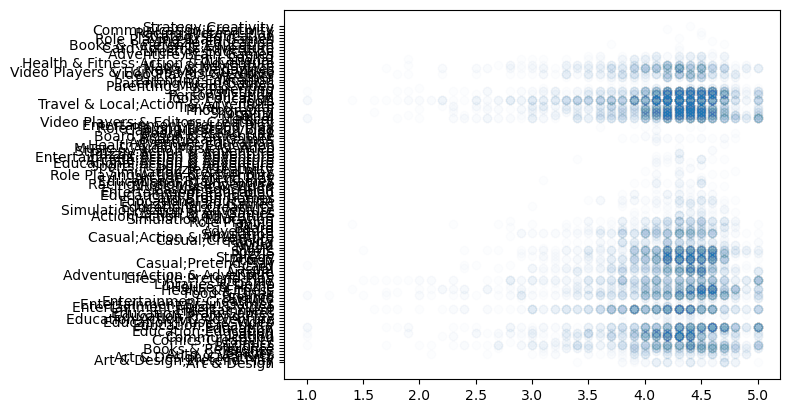

In [19]:
plt.plot(data['Rating'],data['Genres'],'o',alpha=0.01)

In [20]:
data['Android Ver'].value_counts()

4.1 and up            2049
Varies with device    1310
4.0.3 and up          1227
4.0 and up            1124
4.4 and up             868
2.3 and up             579
5.0 and up             527
4.2 and up             334
2.3.3 and up           238
3.0 and up             211
2.2 and up             207
4.3 and up             205
2.1 and up             112
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

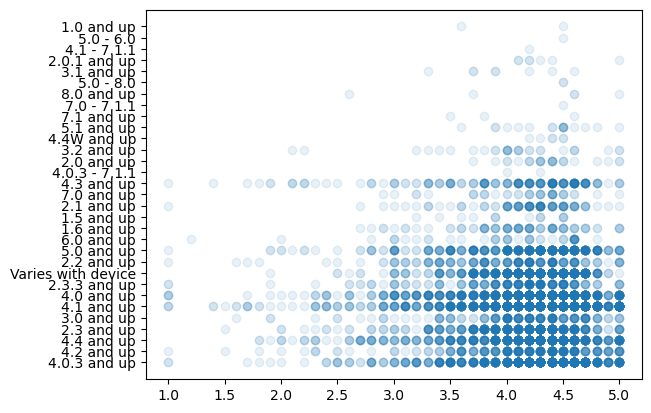

In [21]:
plt.plot(data['Rating'],data['Android Ver'],'o',alpha=0.1)

In [22]:
data=data.drop(['Category','Genres','App','Last Updated','Current Ver','Android Ver'],axis=1)

In [23]:
data=data.reset_index()
data=data.drop(['index'],axis=1)

In [24]:
data

,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,4.1,159,19M,"10,000+",Free,0,Everyone
1,3.9,967,14M,"500,000+",Free,0,Everyone
2,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,4.3,967,2.8M,"100,000+",Free,0,Everyone
...,...,...,...,...,...,...,...
9291,3.8,1195,582k,"100,000+",Free,0,Everyone
9292,4.8,44,619k,"1,000+",Free,0,Everyone
9293,4.0,7,2.6M,500+,Free,0,Everyone
9294,4.5,38,53M,"5,000+",Free,0,Everyone


In [25]:
data['Installs'].value_counts()

1,000,000+        1560
10,000,000+       1244
100,000+          1139
10,000+           1002
5,000,000+         746
1,000+             707
500,000+           532
50,000+            464
5,000+             431
100,000,000+       407
100+               308
50,000,000+        288
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [26]:
data['install1']=None

In [27]:
for i in range(len(data['Installs'])):
    
    if data['Installs'][i]=='1+' or data['Installs'][i]=='5+' or data['Installs'][i]=='10+' or data['Installs'][i]=='50+'or data['Installs'][i]=='100+'or data['Installs'][i]=='500+' or data['Installs'][i]=='1,000+' or data['Installs'][i]=='5,000+':
        data['install1'][i]='1+'
        
    elif data['Installs'][i]=='10,000+' or data['Installs'][i]=='50,000+' or data['Installs'][i]=='100,000+' or data['Installs'][i]=='500,000+':
        data['install1'][i]='10,000+'
        
    elif data['Installs'][i]=='1,000,000+' or data['Installs'][i]=='5,000,000+' or data['Installs'][i]=='10,000,000+' or data['Installs'][i]=='50,000,000+':
        data['install1'][i]='1,000,000+'
        
    elif data['Installs'][i]=='100,000,000+' or data['Installs'][i]=='500,000,000+' or data['Installs'][i]=='1,000,000,000+':
        data['install1'][i]='100,000,000+'


C:\Users\chexi\AppData\Local\Temp\ipykernel_11012\3097840462.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['install1'][i]='10,000+'
C:\Users\chexi\AppData\Local\Temp\ipykernel_11012\3097840462.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['install1'][i]='1,000,000+'
C:\Users\chexi\AppData\Local\Temp\ipykernel_11012\3097840462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['install1'][i]='1+'
C:\Users\ch

In [28]:
data['install2']=None

In [29]:
for i in range(len(data['Installs'])):
    if data['Installs'][i]=='1+':
        data['install2'][i]=1.0
    elif data['Installs'][i]=='5+':
        data['install2'][i]=5.0
    elif data['Installs'][i]=='10+':
        data['install2'][i]=10.0
    elif data['Installs'][i]=='50+':
        data['install2'][i]=50.0
    elif data['Installs'][i]=='100+':
        data['install2'][i]=100.0
    elif data['Installs'][i]=='500+':
        data['install2'][i]=500.0
    elif data['Installs'][i]=='1,000+':
        data['install2'][i]=1000.0
    elif data['Installs'][i]=='5,000+':
        data['install2'][i]=5000.0
    elif data['Installs'][i]=='10,000+':
        data['install2'][i]=10000.0
    elif data['Installs'][i]=='50,000+':
        data['install2'][i]=50000.0
    elif data['Installs'][i]=='100,000+':
        data['install2'][i]=100000.0
    elif data['Installs'][i]=='500,000+':
        data['install2'][i]=500000.0
    elif data['Installs'][i]=='1,000,000+':
        data['install2'][i]=1000000.0
    elif data['Installs'][i]=='5,000,000+':
        data['install2'][i]=5000000.0
    elif data['Installs'][i]=='10,000,000+':
        data['install2'][i]=10000000.0
    elif data['Installs'][i]=='50,000,000+':
        data['install2'][i]=50000000.0
    elif data['Installs'][i]=='100,000,000+':
        data['install2'][i]=100000000.0
    elif data['Installs'][i]=='500,000,000+':
        data['install2'][i]=500000000.0
    elif data['Installs'][i]=='1,000,000,000+':
        data['install2'][i]=1000000000.0

C:\Users\chexi\AppData\Local\Temp\ipykernel_11012\641069014.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['install2'][i]=10000.0
C:\Users\chexi\AppData\Local\Temp\ipykernel_11012\641069014.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['install2'][i]=500000.0
C:\Users\chexi\AppData\Local\Temp\ipykernel_11012\641069014.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['install2'][i]=5000000.0
C:\Users\chex

In [30]:
data['install2']=data['install2'].astype(float)

In [31]:
data

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,install1,install2
0,4.1,159,19M,"10,000+",Free,0,Everyone,"10,000+",10000.0
1,3.9,967,14M,"500,000+",Free,0,Everyone,"10,000+",500000.0
2,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"1,000,000+",5000000.0
3,4.5,215644,25M,"50,000,000+",Free,0,Teen,"1,000,000+",50000000.0
4,4.3,967,2.8M,"100,000+",Free,0,Everyone,"10,000+",100000.0
...,...,...,...,...,...,...,...,...,...
9291,3.8,1195,582k,"100,000+",Free,0,Everyone,"10,000+",100000.0
9292,4.8,44,619k,"1,000+",Free,0,Everyone,1+,1000.0
9293,4.0,7,2.6M,500+,Free,0,Everyone,1+,500.0
9294,4.5,38,53M,"5,000+",Free,0,Everyone,1+,5000.0


In [32]:
a=0
b=0
for i in range(len(data['Size'])):
    if data['Size'][i]=='Varies with device':
        continue
    elif data['Size'][i][-1].title()=='K':
        data['Size'][i]=float(data['Size'][i][:-1])
        a+=data['Size'][i]
        b+=1
    elif data['Size'][i][-1].title()=='M':
        data['Size'][i]=float(data['Size'][i][:-1])*1000
        a+=data['Size'][i]
        b+=1
    else:
        print(i)
        break
mean=a/b


C:\Users\chexi\AppData\Local\Temp\ipykernel_11012\1752389688.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Size'][i]=float(data['Size'][i][:-1])*1000
C:\Users\chexi\AppData\Local\Temp\ipykernel_11012\1752389688.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Size'][i]=float(data['Size'][i][:-1])


In [33]:
data['Size']=numpy.where(data.Size=='Varies with device',mean,data['Size'])

In [34]:
data['Size']=data['Size'].astype(float)

In [35]:
data['Reviews']=data['Reviews'].astype(float)

In [36]:
for i in range(len(data['Price'])):
    if data['Price'][i]!=0:
        data['Price'][i]=float(data['Price'][i][1:])


C:\Users\chexi\AppData\Local\Temp\ipykernel_11012\3223562740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'][i]=float(data['Price'][i][1:])


In [37]:
data['Price']=data['Price'].astype(float)

In [38]:
data['Content Rating'].value_counts()

Everyone           7364
Teen               1080
Mature 17+          452
Everyone 10+        396
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [39]:
data=data.rename(columns={'Content Rating':'CRating'})

In [40]:
data['CRating']=numpy.where(data.CRating=='Adults only 18+','Mature 17+',data['CRating'])

In [41]:
data=data[data.CRating!='Unrated']

In [42]:
data['Type']=numpy.where(data.Type=='Paid',1,0)

In [43]:
data=pandas.get_dummies(data,columns=['CRating'])

In [44]:
data.describe()

,Rating,Reviews,Size,Type,Price,install2,CRating_Everyone,CRating_Everyone 10+,CRating_Mature 17+,CRating_Teen
count,9295.000000,9.295000e+03,9295.000000,9295.000000,9295.000000,9.295000e+03,9295.000000,9295.000000,9295.000000,9295.000000
mean,4.191974,5.162244e+05,22987.461917,0.068531,0.964244,1.799312e+07,0.792254,0.042604,0.048951,0.116192
std,0.515453,3.154939e+06,21329.450579,0.252669,15.876208,9.156688e+07,0.405716,0.201972,0.215777,0.320472
min,1.000000,1.000000e+00,8.500000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.850000e+02,6500.000000,0.000000,0.000000,1.000000e+04,1.000000,0.000000,0.000000,0.000000
50%,4.300000,5.928000e+03,21000.000000,0.000000,0.000000,5.000000e+05,1.000000,0.000000,0.000000,0.000000
75%,4.500000,8.164100e+04,27000.000000,0.000000,0.000000,5.000000e+06,1.000000,0.000000,0.000000,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000,400.000000,1.000000e+09,1.000000,1.000000,1.000000,1.000000


In [45]:
data["Reviews"] = (data["Reviews"] - data["Reviews"].mean()) / data["Reviews"].std()
data["Size"] = (data["Size"] - data["Size"].mean()) / data["Size"].std()
data["Price"] = (data["Price"] - data["Price"].mean()) / data["Price"].std()
data["install2"] = (data["install2"] - data["install2"].mean()) / data["install2"].std()
#mean normalisation on required data

In [46]:
data1=data.drop(['Installs','install2'],axis=1)#retain all the current data while install data leave as classification values

In [47]:
data1=pandas.get_dummies(data1,columns=['install1'])

In [48]:
data2=data.drop(['Installs','install1'],axis=1)#similar to previous one but install data leave as numerical values

In [49]:
data3=data.drop(['Installs','install1','CRating_Everyone','CRating_Everyone 10+','CRating_Mature 17+','CRating_Teen'],axis=1)#drop all extra classification data

In [50]:
data4=data3.drop(['Type','install2'],axis=1)#additionally drop less accurate numerical install data, and drop type as it can partly represent by price

In [51]:
data5=data3.drop(['Price','install2'],axis=1)#drop install as previously, but instead drop price rather than type

In [52]:
data['Rating'].value_counts()

4.4    1099
4.3    1068
4.5    1029
4.2     943
4.6     816
4.1     703
4.0     565
4.7     496
3.9     386
3.8     299
5.0     273
3.7     236
4.8     234
3.6     172
3.5     161
3.4     127
3.3     102
4.9      87
3.0      82
3.1      68
3.2      63
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [53]:
data1['Rating1']=numpy.where(data1.Rating>=4.0,1,0)
data2['Rating1']=numpy.where(data2.Rating>=4.0,1,0)
data3['Rating1']=numpy.where(data3.Rating>=4.0,1,0)
data4['Rating1']=numpy.where(data4.Rating>=4.0,1,0)
data5['Rating1']=numpy.where(data5.Rating>=4.0,1,0)
#convert target value as binary classification

In [54]:
data1['Rating2']=numpy.where(data1.Rating>=2.0,2,1)
data2['Rating2']=numpy.where(data2.Rating>=2.0,2,1)
data3['Rating2']=numpy.where(data3.Rating>=2.0,2,1)
data4['Rating2']=numpy.where(data4.Rating>=2.0,2,1)
data5['Rating2']=numpy.where(data5.Rating>=2.0,2,1)

data1['Rating2']=numpy.where(data1.Rating>=3.0,3,data1['Rating2'])
data2['Rating2']=numpy.where(data2.Rating>=3.0,3,data2['Rating2'])
data3['Rating2']=numpy.where(data3.Rating>=3.0,3,data3['Rating2'])
data4['Rating2']=numpy.where(data4.Rating>=3.0,3,data4['Rating2'])
data5['Rating2']=numpy.where(data5.Rating>=3.0,3,data5['Rating2'])

data1['Rating2']=numpy.where(data1.Rating>=4.0,4,data1['Rating2'])
data2['Rating2']=numpy.where(data2.Rating>=4.0,4,data2['Rating2'])
data3['Rating2']=numpy.where(data3.Rating>=4.0,4,data3['Rating2'])
data4['Rating2']=numpy.where(data4.Rating>=4.0,4,data4['Rating2'])
data5['Rating2']=numpy.where(data5.Rating>=4.0,4,data5['Rating2'])

data1['Rating2']=numpy.where(data1.Rating>=4.5,5,data1['Rating2'])
data2['Rating2']=numpy.where(data2.Rating>=4.5,5,data2['Rating2'])
data3['Rating2']=numpy.where(data3.Rating>=4.5,5,data3['Rating2'])
data4['Rating2']=numpy.where(data4.Rating>=4.5,5,data4['Rating2'])
data5['Rating2']=numpy.where(data5.Rating>=4.5,5,data5['Rating2'])
#convert tart value as multiple classification

In [55]:
data1['Rating1']. value_counts()

1    7313
0    1982
Name: Rating1, dtype: int64

In [56]:
data1['Rating2']. value_counts()

4    4378
5    2935
3    1696
2     231
1      55
Name: Rating2, dtype: int64

In [57]:
def runSVM(df,target,drop,p,a):
    x1a=df.drop(drop,axis=1)
    y1a=df[target]
    xTrain1a,xTest1a,yTrain1a,yTest1a=train_test_split(x1a,y1a,test_size=p,random_state=42,stratify=y1a)
    
    if a==1:
        svm = SVC(class_weight='balanced')
    else:
        svm=SVC()
    param_grid_svm = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }

    grid_svm = GridSearchCV(svm, param_grid=param_grid_svm,
                            cv=5, scoring='accuracy', n_jobs=-1)
    grid_svm.fit(xTrain1a, yTrain1a)

    print("\n--- SVM Results ---")
    print("Best SVM parameters:", grid_svm.best_params_)
    print("Best cross-validation accuracy for SVM: {:.4f}".format(grid_svm.best_score_))
    
    finalSvmModel1a=grid_svm.best_estimator_
    y_pred_final_svm = finalSvmModel1a.predict(xTest1a)
    cm_svm = confusion_matrix(yTest1a, y_pred_final_svm)

    print("\nClassification Report for SVM:")
    print(classification_report(yTest1a, y_pred_final_svm))


    print("Confusion Matrix for SVM:\n", cm_svm)

    # Plot the confusion matrix using a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
#save the svm model process as a function for reuse, where if the last parameter of the function is 1 means balance the data in the model


--- SVM Results ---
Best SVM parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy for SVM: 0.7870

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1586
           1       0.79      1.00      0.88      5850

    accuracy                           0.79      7436
   macro avg       0.39      0.50      0.44      7436
weighted avg       0.62      0.79      0.69      7436

Confusion Matrix for SVM:
 [[   0 1586]
 [   0 5850]]


C:\Users\chexi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chexi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chexi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


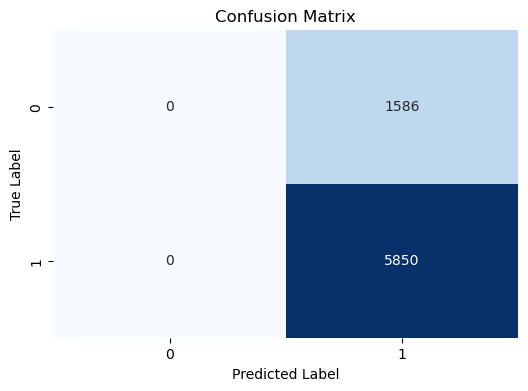

In [58]:
runSVM(data1,'Rating1',['Rating','Rating2','Rating1'],0.8,0)


--- SVM Results ---
Best SVM parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'poly'}
Best cross-validation accuracy for SVM: 0.5410

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.27      0.58      0.37       793
           1       0.83      0.58      0.68      2925

    accuracy                           0.58      3718
   macro avg       0.55      0.58      0.53      3718
weighted avg       0.71      0.58      0.62      3718

Confusion Matrix for SVM:
 [[ 460  333]
 [1240 1685]]


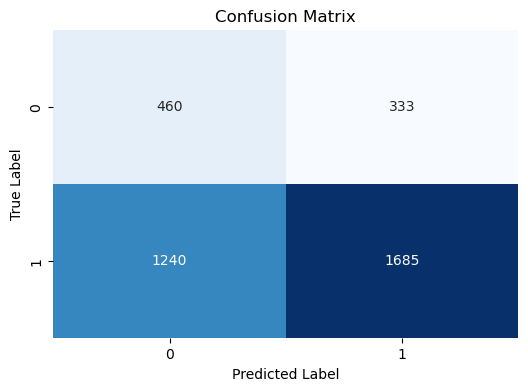

In [59]:
runSVM(data3,'Rating1',['Rating','Rating2','Rating1'],0.4,1)

In [60]:
def runKNN(df,target,drop,p):
    x1a=df.drop(drop,axis=1)
    y1a=df[target]
    xTrain1a,xTest1a,yTrain1a,yTest1a=train_test_split(x1a,y1a,test_size=p,random_state=42,stratify=y1a)
    
    knn=KNeighborsClassifier(weights='distance')
    param_grid_knn = {
        'n_neighbors': list(range(3, 16)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }

    # Set up GridSearchCV for hyperparameter tuning.
    grid_knn = GridSearchCV(knn, param_grid=param_grid_knn,
                            cv=5, scoring='accuracy', n_jobs=-1)
    grid_knn.fit(xTrain1a, yTrain1a)

    print("\n--- KNN Results ---")
    print("Best KNN parameters:", grid_knn.best_params_)
    print("Best cross-validation accuracy for KNN: {:.4f}".format(grid_knn.best_score_))
    
    finalModel1a=grid_knn.best_estimator_
    
    y_pred_knn = finalModel1a.predict(xTest1a)
    cm_knn = confusion_matrix(yTest1a, y_pred_knn)
    print("\nClassification Report for KNN:")
    print(classification_report(yTest1a, y_pred_knn))

    print("\nConfusion Matrix for KNN:")
    print(cm_knn)
    # Plot the confusion matrix using a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
#similarly defined a reusable function for knn model, noticable the parameter 'weight' is set as 'distance' to reduce the effect of data imbalance


--- KNN Results ---
Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Best cross-validation accuracy for KNN: 0.7777

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.39      0.10      0.16       396
           1       0.80      0.96      0.87      1463

    accuracy                           0.77      1859
   macro avg       0.59      0.53      0.52      1859
weighted avg       0.71      0.77      0.72      1859


Confusion Matrix for KNN:
[[  40  356]
 [  63 1400]]


C:\Users\chexi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


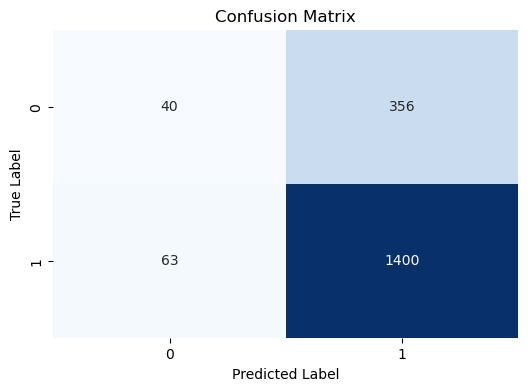

In [61]:
runKNN(data1,'Rating1',['Rating','Rating2','Rating1'],0.2)

In [62]:
def runDT(df,target,drop,p,a):
    x1a=df.drop(drop,axis=1)
    y1a=df[target]
    xTrain1a,xTest1a,yTrain1a,yTest1a=train_test_split(x1a,y1a,test_size=p,random_state=42,stratify=y1a)
    tuned_parameters = [{'criterion': ['gini', 'entropy'],
                     'max_depth': [3, 5, 7],
                     'min_samples_split': [3, 5, 7],
                     'max_features': ["sqrt", "log2", None]}]
    scores = ['f1_macro']
    if a==1:
        for score in scores:
            print("# Tuning hyperparameters for %s" % score)
            print("\n")
            clf = GridSearchCV(DTC(class_weight='balanced',random_state=42), tuned_parameters, cv=5,
                           scoring= score)
            clf.fit(xTrain1a, yTrain1a)
            print("Best parameters set found on the training set:")
            print(clf.best_params_)
            print("\n")
    else:
        for score in scores:
            print("# Tuning hyperparameters for %s" % score)
            print("\n")
            clf = GridSearchCV(DTC(random_state=42), tuned_parameters, cv=5,
                           scoring= score)
            clf.fit(xTrain1a, yTrain1a)
            print("Best parameters set found on the training set:")
            print(clf.best_params_)
            print("\n")
    finalModel1a=clf.best_estimator_
    # fit the DTC model
    tree_model_fit = finalModel1a.fit(xTrain1a, yTrain1a)
    tree_predict = tree_model_fit.predict(xTest1a)
    cm = confusion_matrix(yTest1a, tree_predict, labels=finalModel1a.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=finalModel1a.classes_)

    disp.plot()
    plt.show()

    acc = accuracy_score(yTest1a, tree_predict)
    f1_mac = f1_score(yTest1a, tree_predict, average='macro')
    print(f'Decision Tree accuracy = {round(acc,2)*100}%')
    print(f'Decision Tree F1 score = {round(f1_mac,2)}')
#similarly defined function for decision tree model, last parameter is also use to represent whether balance the data

# Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_split': 7}




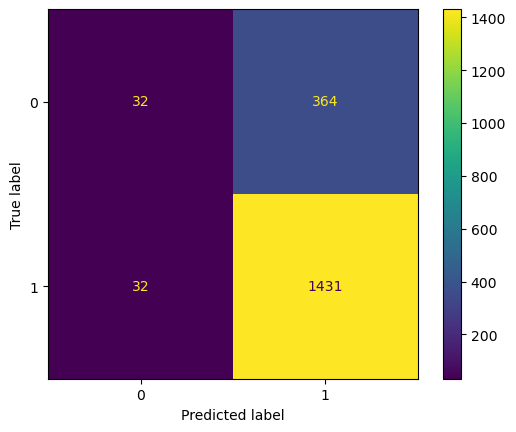

Decision Tree accuracy = 79.0%
Decision Tree F1 score = 0.51


In [63]:
runDT(data2,'Rating1',['Rating','Rating2','Rating1'],0.2,0)

# Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'min_samples_split': 3}




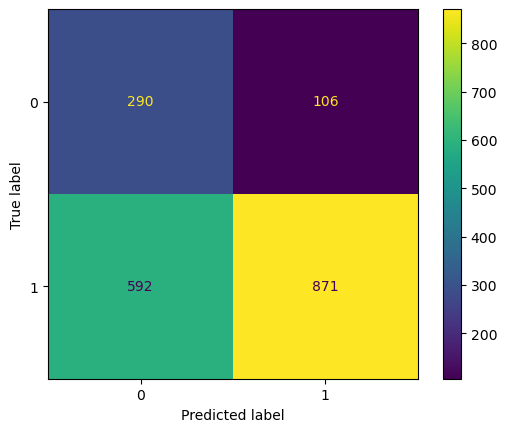

Decision Tree accuracy = 62.0%
Decision Tree F1 score = 0.58


In [64]:
runDT(data4,'Rating1',['Rating','Rating2','Rating1'],0.2,1)

In [65]:
def runRF(df,target,drop,p,a):
    x1a=df.drop(drop,axis=1)
    y1a=df[target]
    xTrain1a,xTest1a,yTrain1a,yTest1a=train_test_split(x1a,y1a,test_size=p,random_state=42,stratify=y1a)
    tuned_parameters = [{'criterion': ['gini', 'entropy'],
                     'max_depth': [3, 5, 7],
                     'min_samples_split': [3, 5, 7],
                     'max_features': ["sqrt", "log2", None]}]
    scores = ['f1_macro']
    if a==1:
        for score in scores:
            print("# Tuning hyperparameters for %s" % score)
            print("\n")
            clf = GridSearchCV(RandomForestClassifier(class_weight='balanced',random_state=42), tuned_parameters, cv=5,
                           scoring= score)
            clf.fit(xTrain1a, yTrain1a)
            print("Best parameters set found on the training set:")
            print(clf.best_params_)
            print("\n")
    else:
        for score in scores:
            print("# Tuning hyperparameters for %s" % score)
            print("\n")
            clf = GridSearchCV(RandomForestClassifier(random_state=42), tuned_parameters, cv=5,
                           scoring= score)
            clf.fit(xTrain1a, yTrain1a)
            print("Best parameters set found on the training set:")
            print(clf.best_params_)
            print("\n")
    finalModel1a=clf.best_estimator_
    tree_model_fit = finalModel1a.fit(xTrain1a, yTrain1a)
    tree_predict = tree_model_fit.predict(xTest1a)
    cm = confusion_matrix(yTest1a, tree_predict, labels=finalModel1a.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=finalModel1a.classes_)
    disp.plot()
    plt.show()
    acc = accuracy_score(yTest1a, tree_predict)
    f1_mac = f1_score(yTest1a, tree_predict, average='macro')
    print(f'Decision Tree accuracy = {round(acc,2)*100}%')
    print(f'Decision Tree F1 score = {round(f1_mac,2)}')
#similarly defined the function for random forest, with same last parameter as before

# Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'min_samples_split': 3}




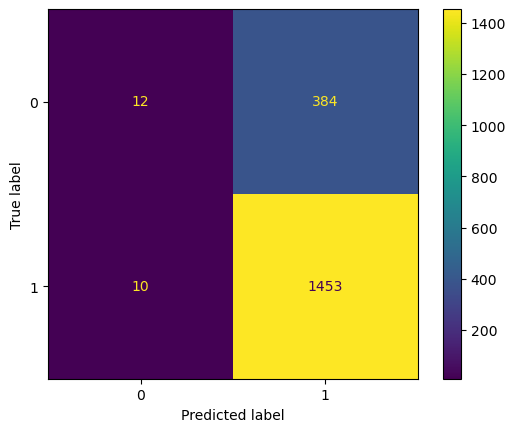

Decision Tree accuracy = 79.0%
Decision Tree F1 score = 0.47


In [66]:
runRF(data3,'Rating1',['Rating','Rating2','Rating1'],0.2,0)

# Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 3}




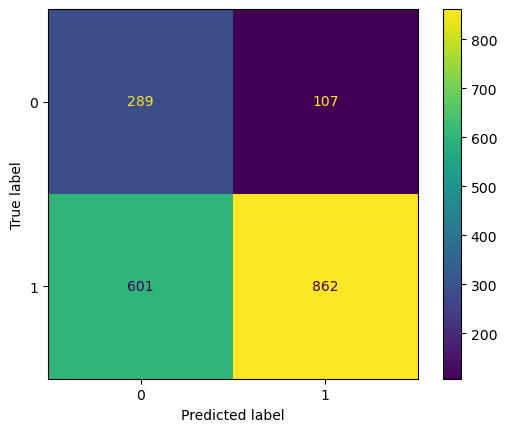

Decision Tree accuracy = 62.0%
Decision Tree F1 score = 0.58


In [67]:
runRF(data5,'Rating1',['Rating','Rating2','Rating1'],0.2,1)


--- SVM Results ---
Best SVM parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation accuracy for SVM: 0.5135

Classification Report for SVM:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00       208
           3       0.00      0.00      0.00      1526
           4       0.52      0.89      0.65      3940
           5       0.43      0.26      0.32      2642

    accuracy                           0.50      8366
   macro avg       0.19      0.23      0.20      8366
weighted avg       0.38      0.50      0.41      8366

Confusion Matrix for SVM:
 [[   0    0    0   13   37]
 [   0    0    0  120   88]
 [   0    0    0 1192  334]
 [   0    0    0 3504  436]
 [   0    0    0 1961  681]]


C:\Users\chexi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chexi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chexi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


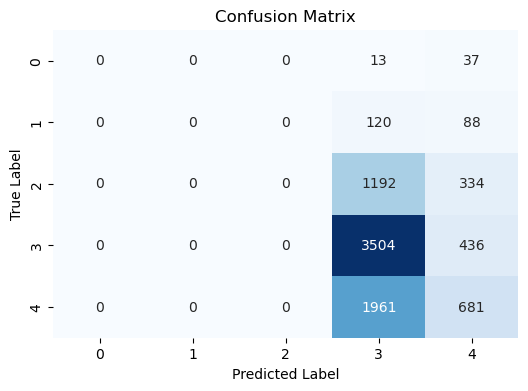

In [68]:
runSVM(data1,'Rating2',['Rating','Rating2','Rating1'],0.9,0)


--- SVM Results ---
Best SVM parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'poly'}
Best cross-validation accuracy for SVM: 0.3542

Classification Report for SVM:
              precision    recall  f1-score   support

           1       0.03      0.64      0.05        50
           2       0.04      0.30      0.08       208
           3       0.25      0.25      0.25      1526
           4       0.58      0.58      0.58      3940
           5       0.52      0.07      0.12      2642

    accuracy                           0.35      8366
   macro avg       0.28      0.37      0.22      8366
weighted avg       0.48      0.35      0.36      8366

Confusion Matrix for SVM:
 [[  32    7   10    0    1]
 [  68   62   60   13    5]
 [ 247  391  375  475   38]
 [ 316  596  626 2270  132]
 [ 522  337  419 1177  187]]


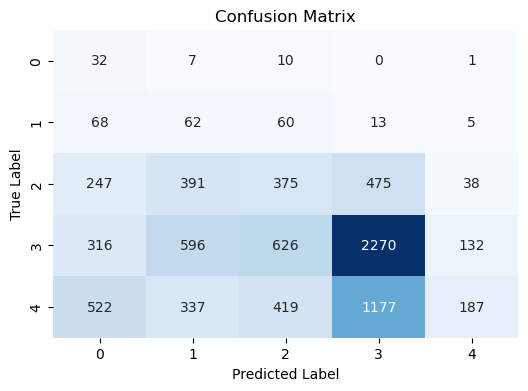

In [69]:
runSVM(data1,'Rating2',['Rating','Rating2','Rating1'],0.9,1)


--- KNN Results ---
Best KNN parameters: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
Best cross-validation accuracy for KNN: 0.5112

Classification Report for KNN:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.26      0.17      0.21        46
           3       0.33      0.28      0.30       339
           4       0.58      0.64      0.61       876
           5       0.49      0.48      0.48       587

    accuracy                           0.51      1859
   macro avg       0.33      0.31      0.32      1859
weighted avg       0.50      0.51      0.50      1859


Confusion Matrix for KNN:
[[  0   0   3   1   7]
 [  0   8   8  16  14]
 [  1   8  95 149  86]
 [  2   9 115 563 187]
 [  2   6  65 234 280]]


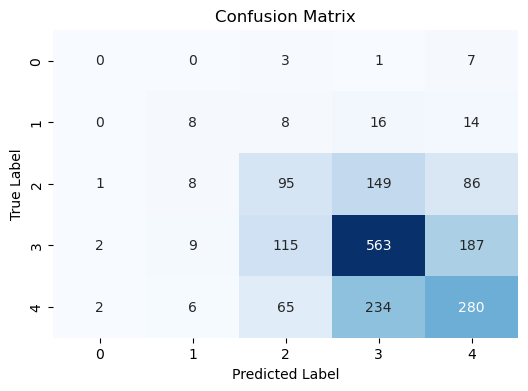

In [70]:
runKNN(data1,'Rating2',['Rating','Rating2','Rating1'],0.2)

# Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'min_samples_split': 5}




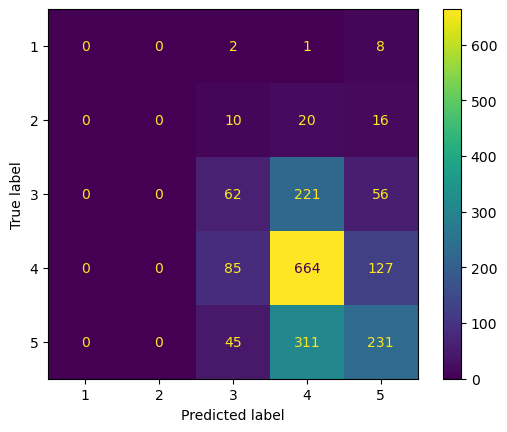

Decision Tree accuracy = 51.0%
Decision Tree F1 score = 0.26


In [71]:
runDT(data3,'Rating2',['Rating','Rating2','Rating1'],0.2,0)

# Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_split': 3}




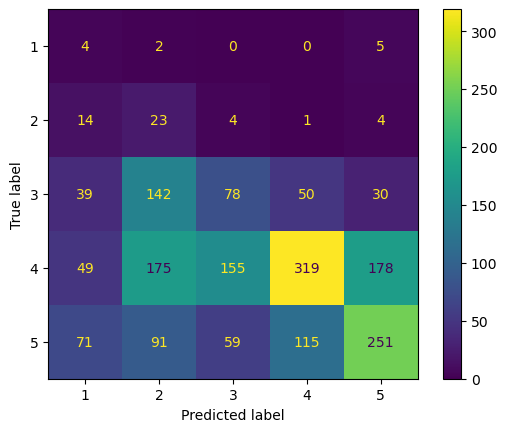

Decision Tree accuracy = 36.0%
Decision Tree F1 score = 0.27


In [72]:
runDT(data3,'Rating2',['Rating','Rating2','Rating1'],0.2,1)

# Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_split': 3}




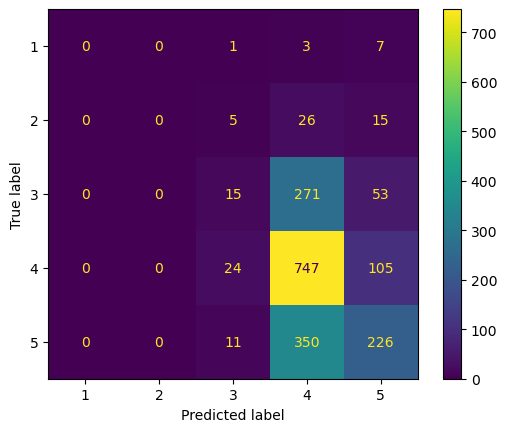

Decision Tree accuracy = 53.0%
Decision Tree F1 score = 0.24


In [73]:
runRF(data3,'Rating2',['Rating','Rating2','Rating1'],0.2,0)

# Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_split': 5}




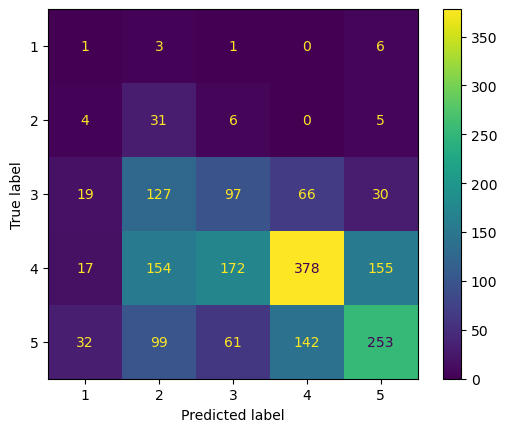

Decision Tree accuracy = 41.0%
Decision Tree F1 score = 0.29


In [74]:
runRF(data3,'Rating2',['Rating','Rating2','Rating1'],0.2,1)

In [75]:
x3a=data1.drop(['Rating','Rating2','Rating1'],axis=1)
y3a=data1['Rating']
xTrain3a,xTest3a,yTrain3a,yTest3a=train_test_split(x3a,y3a,test_size=0.2,random_state=42)
lasso=Lasso()
lasso.fit(xTrain3a,yTrain3a)
Y_pred2 = lasso.predict(xTest3a)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(yTest3a, Y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(yTest3a, Y_pred2))
print('Root Mean Squared Error:', numpy.sqrt(metrics.mean_squared_error(yTest3a, Y_pred2)))
print('R^2:',metrics.r2_score(yTest3a, Y_pred2))

# Print the coefficients and intercept
print('Coefficients:', lasso.coef_)
print('Intercept:', lasso.intercept_)


Mean Absolute Error: 0.3702756981504861
Mean Squared Error: 0.28060859806804694
Root Mean Squared Error: 0.5297250211836769
R^2: -6.35487712909999e-05
Coefficients: [ 0.  0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0.]
Intercept: 4.192818719741797


In [76]:
ridge = Ridge()
ridge.fit(xTrain3a,yTrain3a)
Y_pred1 = ridge.predict(xTest3a)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(yTest3a, Y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(yTest3a, Y_pred1))
print('Root Mean Squared Error:', numpy.sqrt(metrics.mean_squared_error(yTest3a, Y_pred1)))
print('R^2:',metrics.r2_score(yTest3a, Y_pred1))
print('Coefficients:', ridge.coef_)
print('Intercept:', ridge.intercept_)



Mean Absolute Error: 0.3633546434597411
Mean Squared Error: 0.27160666323361743
Root Mean Squared Error: 0.5211589615785355
R^2: 0.03201852910625291
Coefficients: [ 0.01164583  0.01754612  0.17736469 -0.01902059  0.01288843  0.0237765
 -0.0545154   0.01785048 -0.07727679  0.05604902 -0.12370265  0.14493041]
Intercept: 4.1941947891155555


In [77]:
model = LinearRegression()

# Fit the model to the training data
model.fit(xTrain3a,yTrain3a)

Y_pred = model.predict(xTest3a)
print('Mean Absolute Error:', metrics.mean_absolute_error(yTest3a, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yTest3a, Y_pred))
print('Root Mean Squared Error:', numpy.sqrt(metrics.mean_squared_error(yTest3a, Y_pred)))
print('R^2:',metrics.r2_score(yTest3a, Y_pred))



Mean Absolute Error: 0.3633561296053775
Mean Squared Error: 0.2716098129902517
Root Mean Squared Error: 0.521161983446847
R^2: 0.032007303659779995
